## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Loading the data into pandas dataframe
df = pd.read_csv('train.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
print(df.shape)
'''The dataset has 1460 Rows and 82 Columns.'''

(1460, 82)


'The dataset has 1460 Rows and 82 Columns.'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Finding the summary of variables from the dataset.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Hypothesis 1: There is a strong correlation between house prices and the size of the property.
This hypothesis assumes that larger properties will have higher prices. The code uses a scatterplot to visualize the relationship between the LotArea (size) and SalePrice variables in the dataset. If there is a strong positive correlation between the two variables, this hypothesis would be supported.

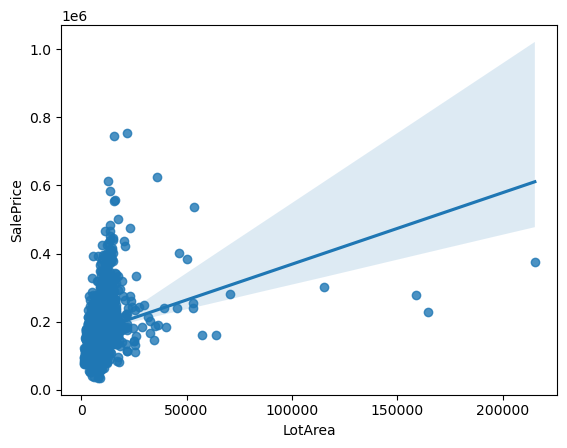

In [6]:
# Use a scatterplot to visualize the relationship between house prices and size
sns.regplot(x="LotArea", y="SalePrice", data=df)
plt.savefig('SalePrice Vs Size of Property Positive.png')


As we can see, there is a steep correlation of the SalePrice with the LotArea, our Hypothesis 1 is supported.

#### Hypothesis 2: The age of a house is negatively correlated with its price.
 This hypothesis assumes that older houses will have lower prices. The code uses a scatterplot to visualize the relationship between the YearBuilt (age) and SalePrice variables in the dataset. If there is a strong negative correlation between the two variables, this hypothesis would be supported.

The Pearson correlation coefficient between age and sale price is -0.52


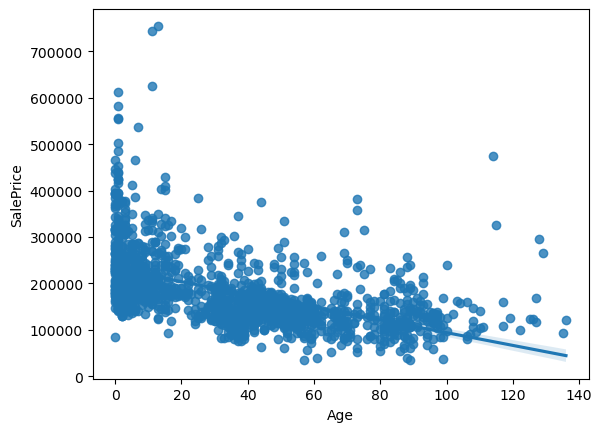

In [7]:
# Use a scatterplot to visualize the relationship between house prices and age
# sns.regplot(x="YearBuilt", y="SalePrice", data=df )


# Create a new column for age of house (in years) by subtracting year built from year sold 
df['Age'] = df['YrSold'] - df['YearBuilt']

# Calculate Pearson correlation coefficient between age and sale price 
corr = df['Age'].corr(df['SalePrice'])
print(f'The Pearson correlation coefficient between age and sale price is {corr:.2f}')

# Plot scatterplot of age and sale price 
sns.regplot(x='Age', y='SalePrice', data=df)
plt.savefig('SalePrice Vs Age Negative.png')


In this case also, we see a gradual decrement in house price with the increasing age of the house. In additon to that, the regression line suggests that the age of house and saleprice are negatively correlated.

#### Hypothesis 3: The number of bedrooms and bathrooms is positively correlated with the price of a house.
This hypothesis assumes that houses with more bedrooms and bathrooms will have higher prices. The code uses boxplots to visualize the relationship between the BedroomAbvGr and FullBath variables (number of bedrooms and bathrooms, respectively) and the SalePrice variable. If there is a strong positive correlation between these variables and house prices, this hypothesis would be supported.

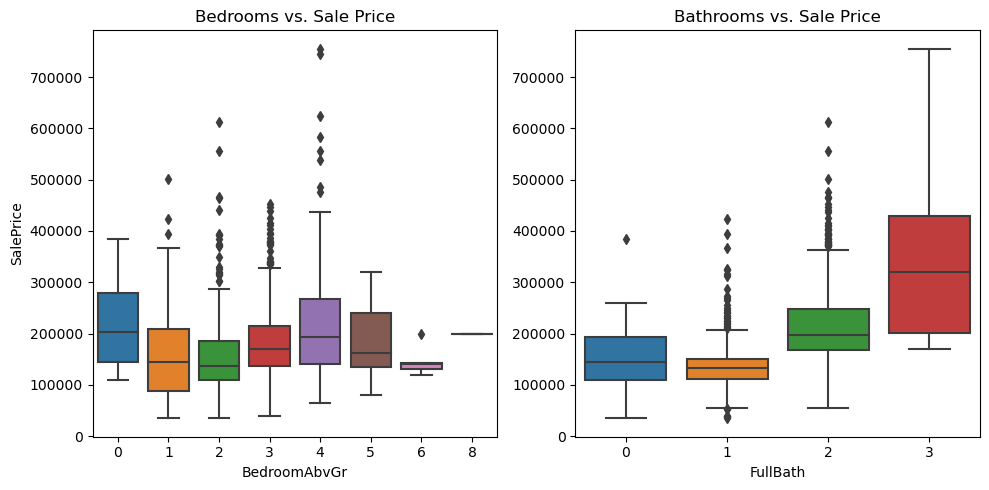

In [8]:

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

# Use boxplots to visualize the relationship between house prices and number of bedrooms/bathrooms
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df, ax=axes[0])
sns.boxplot(x="FullBath", y="SalePrice", data=df, ax=axes[1])

# Set titles and labels for the subplots
axes[0].set(title="Bedrooms vs. Sale Price", xlabel="BedroomAbvGr", ylabel="SalePrice")
axes[1].set(title="Bathrooms vs. Sale Price", xlabel="FullBath", ylabel="")
plt.tight_layout()  # adding this line to adjust subplot spacing
# plt.show()

plt.savefig('SalePrice Vs Bedroom_Bathroom.png')

#### Distribution of SalePrice according to the HouseStyle
To get the distribution of sale price of houses by house style, we can use pandas library and the df.groupby('HouseStyle')['SalePrice'].describe() method. We can also plot a boxplot using seaborn library. For example:

            count           mean            std       min       25%       50%  \
HouseStyle                                                                      
1.5Fin      154.0  143116.740260   54277.941119   37900.0  114625.0  132000.0   
1.5Unf       14.0  110150.000000   19036.473090   76000.0   98175.0  111250.0   
1Story      726.0  175985.477961   77055.715011   34900.0  127000.0  154750.0   
2.5Fin        8.0  220000.000000  118211.976671  104000.0  164250.0  194000.0   
2.5Unf       11.0  157354.545455   63934.128032  101000.0  125000.0  133900.0   
2Story      445.0  210051.764045   87339.213570   40000.0  159500.0  190000.0   
SFoyer       37.0  135074.486486   30480.898192   75500.0  127500.0  135960.0   
SLvl         65.0  166703.384615   38305.161339   91000.0  145000.0  164500.0   

                 75%       max  
HouseStyle                      
1.5Fin      159325.5  410000.0  
1.5Unf      120500.0  139400.0  
1Story      209350.0  611657.0  
2.5Fin      223750.0  47

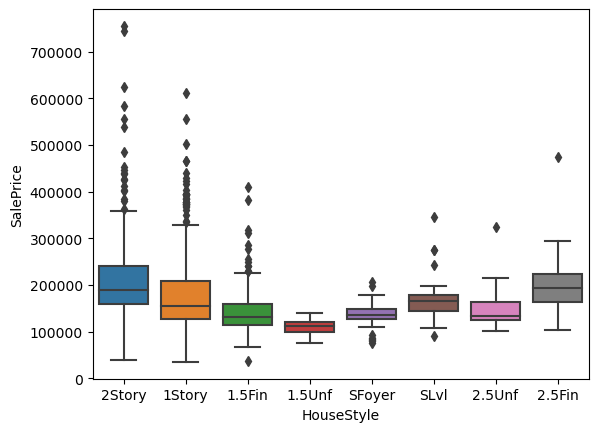

In [9]:
# Geting distribution of sale price by house style 
print(df.groupby('HouseStyle')['SalePrice'].describe())

# Plotting boxplot of sale price by house style 
sns.boxplot(x='HouseStyle', y='SalePrice', data=df)
plt.savefig('SalePrice Vs HouseStyle.png')

#### Hypothesis 4: There is a strong positive correlation between the SalePrice of the houses and their living area quality.
To test the hypothesis that there is a positive correlation between living area and sale price of houses, we can use linear regression and plot a regression line using seaborn library. If there is a strong positive correlation between these variables and house prices, this hypothesis would be supported. For example:

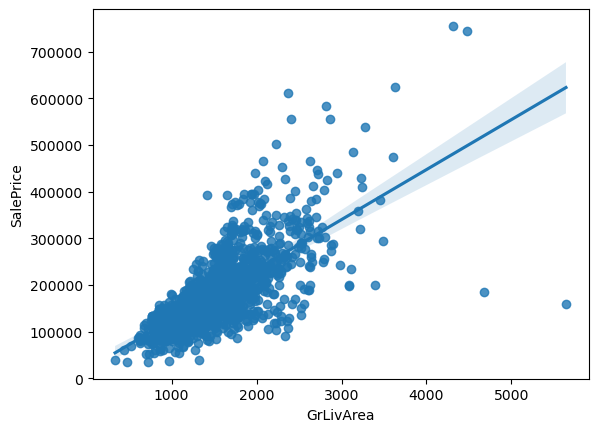

In [10]:
# Fit linear regression model
X = df['GrLivArea']
y = df['SalePrice']

# Plot regression line and scatterplot
sns.regplot(x='GrLivArea', y='SalePrice', data=df)
plt.savefig('SalePrice Vs GrLivArea.png')


## Conclusion:
Overall, the EDA of the house price dataset provided valuable insights into the relationships between different features and the sale price of homes, which can be useful in predicting and understanding housing market trends. These insights can inform real estate decisions and help individuals make informed choices when buying or selling residential properties.
